# 1. 학습 데이터를 확인하자

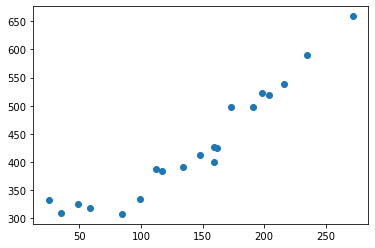

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 학습 데이터를 읽는다.
train = np.loadtxt('click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

# 점 그래프를 그린다
plt.plot(train_x, train_y, 'o')
plt.show()

# 1차함수로 구현한다

In [2]:
# 매개변수를 초기화한다
theta0 = np.random.rand()
theta1 = np.random.rand()

# 예측함수
def f(x):
    return theta0 + theta1 * x

# 목적함수
def E(x, y):
    return 0.5 * np.sum((y-f(x))**2)

In [3]:
# 표준화
# 미리 해두면 매개변수가 빨리 수렴하게 됨.
# z = (x - avg)/sigma

mu = train_x.mean()
sigma = train_x.std()

def standardize(x):
    return (x-mu)/sigma

train_z = standardize(train_x)

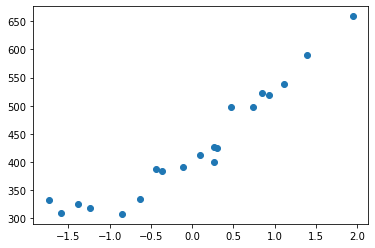

In [4]:
# 그래프로 나타내기
plt.plot(train_z, train_y, 'o')
plt.show()

In [5]:
# 학습률
ETA = 1e-3

# 오차의 차분
diff = 1

# 갱신 횟수
count = 0

# 학습을 반복한다
error = E(train_z, train_y)  # 목적함수에 대입
while diff > 1e-2:
    # 갱신 결과를 임시변수에 저장한다
    tmp0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)
    
    # 매개변수를 갱신한다 (두 매개변수의 갱신은 동시에 이뤄져야 함)
    theta0 = tmp0
    theta1 = tmp1
    
    # 이전 회의 오차와의 차분을 계산한다
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error
    
    # 로그를 출력한다
    count+=1
    log = '{}회째 : theta0 = {:.3f}, theta1 = {:.3f}, 차분 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))

1회째 : theta0 = 8.945, theta1 = 2.540, 차분 = 76215.5812
2회째 : theta0 = 17.349, theta1 = 4.358, 차분 = 73197.4442
3회째 : theta0 = 25.585, theta1 = 6.141, 차분 = 70298.8254
4회째 : theta0 = 33.657, theta1 = 7.888, 차분 = 67514.9919
5회째 : theta0 = 41.566, theta1 = 9.599, 차분 = 64841.3982
6회째 : theta0 = 49.318, theta1 = 11.277, 차분 = 62273.6788
7회째 : theta0 = 56.915, theta1 = 12.921, 차분 = 59807.6412
8회째 : theta0 = 64.359, theta1 = 14.532, 차분 = 57439.2586
9회째 : theta0 = 71.655, theta1 = 16.111, 차분 = 55164.6639
10회째 : theta0 = 78.805, theta1 = 17.658, 차분 = 52980.1432
11회째 : theta0 = 85.812, theta1 = 19.175, 차분 = 50882.1296
12회째 : theta0 = 92.679, theta1 = 20.661, 차분 = 48867.1972
13회째 : theta0 = 99.408, theta1 = 22.117, 차분 = 46932.0562
14회째 : theta0 = 106.003, theta1 = 23.545, 차분 = 45073.5468
15회째 : theta0 = 112.466, theta1 = 24.943, 차분 = 43288.6343
16회째 : theta0 = 118.800, theta1 = 26.314, 차분 = 41574.4044
17회째 : theta0 = 125.007, theta1 = 27.657, 차분 = 39928.0580
18회째 : theta0 = 131.090, theta1 = 28.974, 

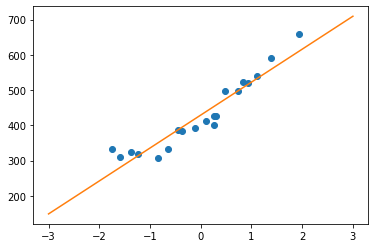

In [6]:
# 학습 데이터와 f(x) 그래프로 나타냄

x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()

# 3. 검증

In [7]:
f(standardize(100))

370.96717038694874

In [9]:
f(standardize(200))

510.4698137085699

In [10]:
f(standardize(300))

649.9724570301911

# 4. 다항식 회귀를 구현한다

In [11]:
# 매개변수를 초기화한다
theta = np.random.rand(3)

# 학습 데이터를 행렬의 형태로 만든다
# np.vstack은 행을 추가하는 함수. 해당 행렬에 .T로 transpose 수행
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x**2]).T

X = to_matrix(train_z)

# 예측함수
def f(x):
    return np.dot(x, theta)

In [12]:
# 오차의 차분
diff = 1

# 학습을 반복한다
error = E(X, train_y)
while diff > 1e-2:
    # 매개변수를 갱신한다
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    
    # 이전의 오차와의 차분 계산
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

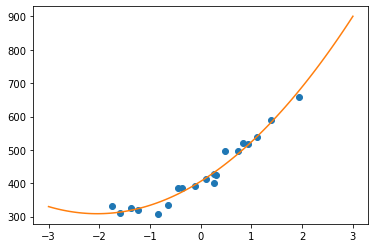

In [13]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()

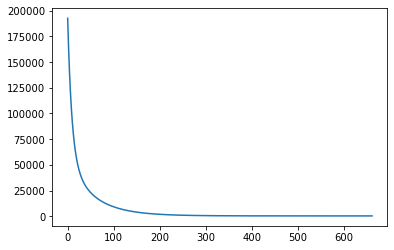

In [14]:
# 평균제곱오차
def MSE(x, y):
    return (1/x.shape[0]) * np.sum((y-f(x))**2)

# 매개변수를 무작위로 초기화한다
theta = np.random.rand(3)

# 평균제곱오차의 히스토리
errors = []

# 오차의 차분
diff = 1

# 학습을 반복한다
errors.append(MSE(X, train_y))

while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]
    
# 오차를 그래프로 나타낸다
x = np.arange(len(errors))

plt.plot(x, errors)
plt.show()

# 5. 확률 경사하강법을 구현한다

In [15]:
# 매개변수를 무작위로 초기화
theta = np.random.rand(3)

# 평균제곱오차의 히스토리
errors = []

# 오차의 차분
diff = 1

# 학습을 반복한다
errors.append(MSE(X, train_y))
while diff > 1e-2:
    # 학습 데이터를 다시 나열하기 위해 무작위 순열을 마련한다
    p = np.random.permutation(X.shape[0])
    # 학습 데이터를 무작위로 꺼내어 확률 경사하강법으로 매개변수를 갱신한다.
    for x, y in zip(X[p, :], train_y[p]):
        theta = theta - ETA * (f(x) - y) * x
    # 이전에 꼐산된 오차와의 차분을 계산한다
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]

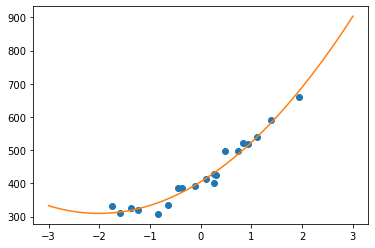

In [16]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()